<a href="https://colab.research.google.com/github/songiangvn/AI-Machine-Learning-for-Coders/blob/main/Chapter_3_4_Multiclass_Classification_and_Dropout_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

When building multiclass
 classifiers the models are almost the same, but there are a few important differences.
 Instead of a single neuron that is sigmoid-activated, or two neurons that are binary
activated, your output layer will now require n neurons, where n is the number of
 classes you want to classify.

Nếu mọi người nhớ lại thì thật ra tụi mình đã từng làm bài toán phân loại đa lớp ở chương 2 với bộ dữ liệu [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) rồi đó. Nếu mọi người chưa xem thì có thể nhấp vào [Chương 2](https://github.com/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter2_Introduction_to_Computer_Vision.ipynb) để tìm hiểu thêm nha. Hiểu đơn giản là thay vì xác định 2 đối tượng (phân loại nhị phân), giờ đây chúng ta sẽ xác định nhiều đối tượng hơn.

Chính vì sự khác biệt ấy nên khi xây dựng mô hình, tụi mình cũng có một vài thay đổi quan trọng. Đây là điểm mấu chốt cần nắm nha:

- Với bài toán **phân loại nhị phân (binary classification)**, lớp tuyến tính cuối cùng hoặc lớp kết nối đầy đủ có:
  - **Số đơn vị đầu ra là 1**, với hàm kích hoạt là **sigmoid**.
  - Đầu ra sẽ là một giá trị trong khoảng từ 0 đến 1 (tỷ lệ từ 0% đến 100%). Ta đặt một **ngưỡng (threshold)** để phân định: nếu thấp hơn ngưỡng thì thuộc nhãn 0, ngược lại là nhãn 1.
  - Hàm mất mát (loss function) được sử dụng là **Binary Crossentropy**.

  ```python
  Dense(1, activation='sigmoid')

  model.compile(loss='binary_crossentropy', ...)
  ```

- Với bài toán **phân loại đa lớp (multi-class classification)**:
  - **Số đơn vị đầu ra của lớp cuối cùng bằng với số nhãn phân loại**, và hàm kích hoạt là **softmax**.
  - Đầu ra sẽ là một vector với số lượng phần tử bằng số nhãn. Mỗi giá trị trong vector biểu thị xác suất đối tượng thuộc về nhãn tương ứng.
  - Ví dụ: Nếu có 4 nhãn, đầu ra có thể là **[0.1, 0.2, 0.5, 0.2]**, và nhãn dự đoán là nhãn 2 (vị trí có xác suất cao nhất, tính từ chỉ mục 0).
  - Hàm mất mát (loss function) sử dụng là **Categorical Crossentropy**.

  ```python
  Dense(n_output, activation='softmax')

  model.compile(loss='categorical_crossentropy', ...)
  ```

## Rock Paper Scissors Dataset

Bài toán phân loại 3 loại búa kéo bao

In [1]:
import tensorflow_datasets as tfds

# Tải dữ liệu về
dataset, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)

# Lấy tập train và test
train_dataset = dataset['train']
test_dataset = dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.Z3S6YB_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.Z3S6YB_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


Trong sách dùng cách download zip file còn ở đây là dùng tfds

In [2]:
import numpy as np

# Lọc lấy ảnh và nhãn của tập huấn luyện
train_imgs = []
train_labels = []

for image, label in train_dataset:
    train_imgs.append(image.numpy())
    train_labels.append(label.numpy())

# Lọc lấy ảnh và nhãn của tập kiểm tra
test_imgs = []
test_labels = []

for image, label in test_dataset:
    test_imgs.append(image.numpy())
    test_labels.append(label.numpy())

# Chuyển sang mảng numpy và rescale
train_imgs = np.array(train_imgs).astype('float32') / 255.0 # normalization
train_labels = np.array(train_labels)
test_imgs = np.array(test_imgs).astype('float32') / 255.0 # normalization
test_labels = np.array(test_labels)

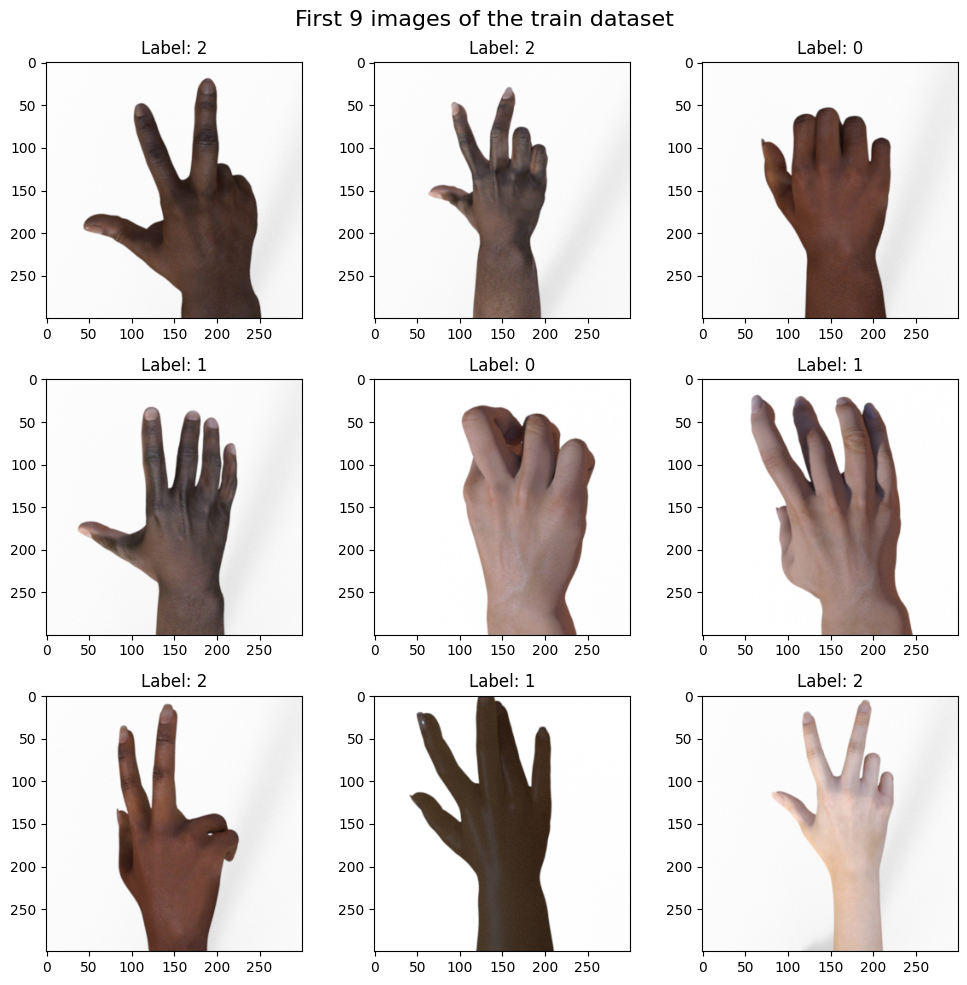

In [3]:
import matplotlib.pyplot as plt

# Hiển thị 9 ảnh và nhãn
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
fig.suptitle('First 9 images of the train dataset', fontsize = 16)
for i in range(9):
    axs[i].imshow(train_imgs[i])
    axs[i].set_title(f'Label: {train_labels[i]}')

plt.tight_layout()
plt.show()

## Image Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Tiến hành gia tăng dữ liệu (image augmentation)
# Định nghĩa nhưng thao tác chỉnh ảnh bên trong
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

# Tiến hành gia tăng dữ liệu ảnh (image augmentation) cho tập huấn luyện
train_imgs_augmented = train_datagen.flow(
    train_imgs,
    train_labels,
    batch_size = 32
)

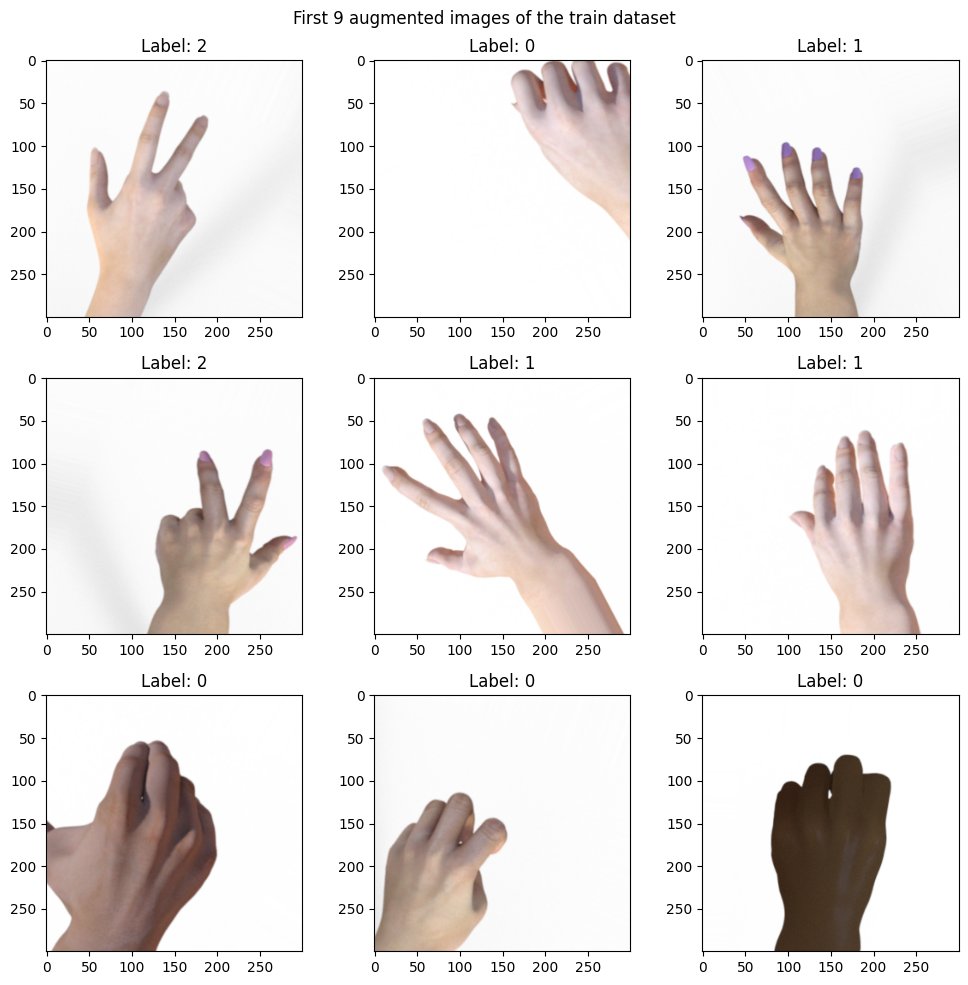

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
fig.suptitle('First 9 augmented images of the train dataset')
for i in range(9):
    axs[i].imshow(train_imgs_augmented[0][0][i])
    axs[i].set_title(f'Label: {train_imgs_augmented[0][1][i]}')

plt.tight_layout()
plt.show()



In [6]:
# Xây dựng kiến trúc mô hình
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(3, activation = "softmax") # Vì đây là phân loại đa lớp nên sử dụng softmax
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(train_imgs_augmented, epochs = 25,
          validation_data = (test_imgs, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 888ms/step - accuracy: 0.3596 - loss: 1.2728 - val_accuracy: 0.6371 - val_loss: 0.7730
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 659ms/step - accuracy: 0.6123 - loss: 0.8177 - val_accuracy: 0.8871 - val_loss: 0.3557
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 676ms/step - accuracy: 0.7823 - loss: 0.5167 - val_accuracy: 0.8522 - val_loss: 0.3420
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 658ms/step - accuracy: 0.8615 - loss: 0.3634 - val_accuracy: 0.9651 - val_loss: 0.1124
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 685ms/step - accuracy: 0.8937 - loss: 0.2807 - val_accuracy: 0.9704 - val_loss: 0.1279
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 671ms/step - accuracy: 0.9105 - loss: 0.2338 - val_accuracy: 0.9247 - val_loss: 0.1814
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 654ms/step - accuracy: 0.9170 - loss: 0.2277 - val_accuracy: 0.9731 - val_loss: 0.0576
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 689ms/step - accuracy: 0.9566 - loss: 0.1222 - val_accu

In [8]:
# Kết quả đánh giá mô hình
result = model.evaluate(test_imgs, test_labels)
print(f'Test loss: {result[0]}')
print(f'Test accuracy: {result[1]}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.0067
Test loss: 0.007141469046473503
Test accuracy: 1.0


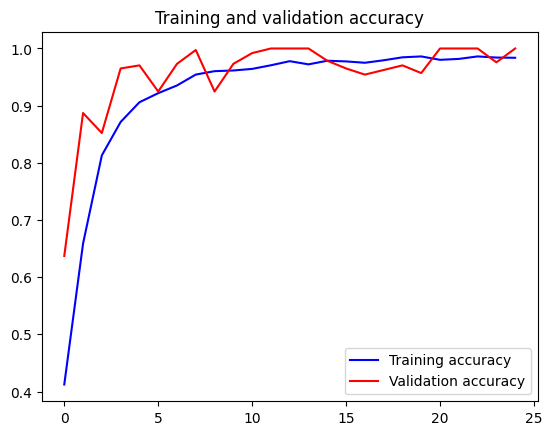

In [9]:
# Vẽ biểu đồ trong quá trình huấn luyện
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Dropout Regularization

Khi có quá nhiều neuron có thể dẫn tới overspecialized với tập dữ liệu training set và từ đó dẫn tới overfitting

Trong quá trình huấn luyện, nếu bạn ngắt kết nối ngẫu nhiên một số neuron (tạm thời bỏ qua đóng góp của chúng cho các neuron ở tầng kế tiếp), điều này sẽ ngăn chặn việc các neuron trở nên quá chuyên môn hóa. Mặc dù mạng vẫn học được cùng một số lượng tham số, nhưng nhờ vậy, khả năng tổng quát hóa của mô hình sẽ được cải thiện—tức là mô hình sẽ linh hoạt hơn khi xử lý các đầu vào khác nhau.

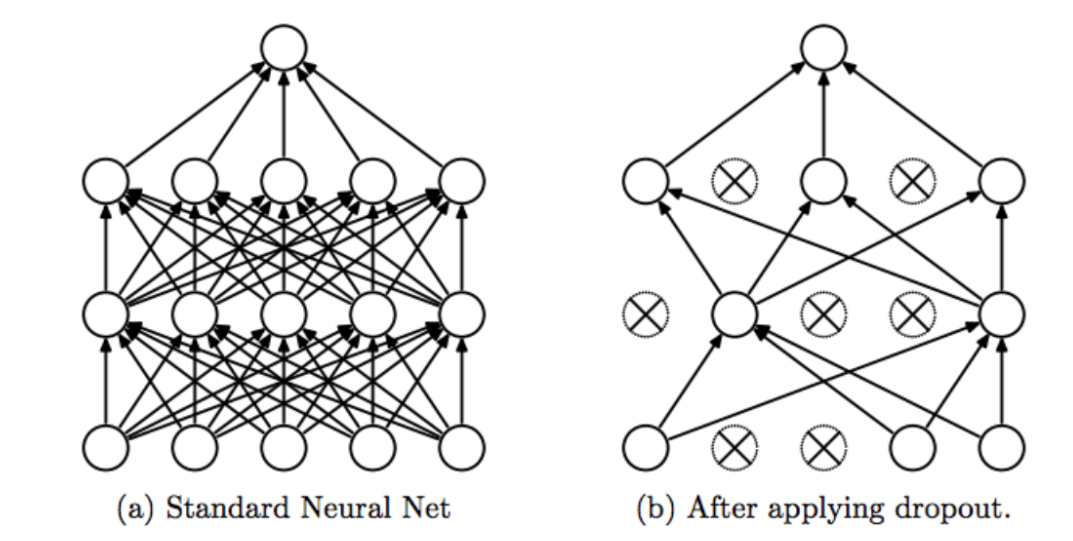

### Áp dụng Dropout cho bộ dữ liệu Fashion MNIST

In [10]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()\

# Chuản hóa hình ảnh
train_images = train_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# Định nghĩa mô hình sau khi thêm dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Flatten, Dropout

model_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2), # thêm cái này vào với ý nghĩa là 20% số neuron sẽ bị bỏ qua trong specified layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Định nghĩa hàm mất mát, hàm tối ưu
model_dropout.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # Mặc định learnig rate là 0.001

# Huấn luyện mô hình
history = model_dropout.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7107 - loss: 0.7967 - val_accuracy: 0.8443 - val_loss: 0.4418
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8377 - loss: 0.4488 - val_accuracy: 0.8604 - val_loss: 0.3959
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8573 - loss: 0.3993 - val_accuracy: 0.8617 - val_loss: 0.3789
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8614 - loss: 0.3804 - val_accuracy: 0.8644 - val_loss: 0.3726
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8714 - loss: 0.3608 - val_accuracy: 0.8714 - val_loss: 0.3573
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8756 - loss: 0.3436 - val_accuracy: 0.8711 - val_loss: 0.3498
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8816 - loss: 0.3257 - val_accuracy: 0.8741 - val_loss: 0.3525
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8792 - loss: 0.3301 -

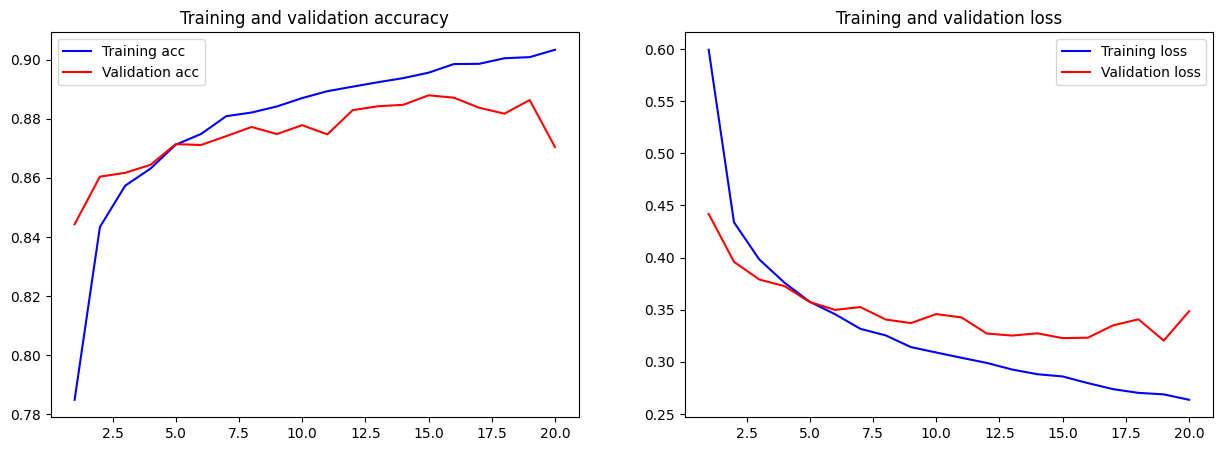

In [13]:
# Vẽ biểu đồ độ chính xác trên tập train và test
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

loss_acc = history.history['loss']
val_loss = history.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(epochs, train_acc, 'b', label = 'Training acc')
axs[0].plot(epochs, val_acc, 'r', label = 'Validation acc')
axs[0].set_title('Training and validation accuracy')
axs[0].legend()

axs[1].plot(epochs, loss_acc, 'b', label = 'Training loss')
axs[1].plot(epochs, val_loss, 'r', label = 'Validation loss')
axs[1].set_title('Training and validation loss')
axs[1].legend()

plt.show()

In [14]:
# Đánh giá mô hình sau khi thêm lớp dropout
model_dropout.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3586


[0.3484988510608673, 0.8704000115394592]

In [15]:
# Định nghĩa mô hình trước khi thêm dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Định nghĩa hàm mất mát, hàm tối ưu
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # Mặc định learnig rate là 0.001

# Huấn luyện mô hình
history1 = model.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7797 - loss: 0.6113 - val_accuracy: 0.8576 - val_loss: 0.3955
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8660 - loss: 0.3701 - val_accuracy: 0.8460 - val_loss: 0.4063
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8772 - loss: 0.3300 - val_accuracy: 0.8685 - val_loss: 0.3598
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8855 - loss: 0.3039 - val_accuracy: 0.8729 - val_loss: 0.3567
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8947 - loss: 0.2850 - val_accuracy: 0.8783 - val_loss: 0.3466
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9004 - loss: 0.2652 - val_accuracy: 0.8761 - val_loss: 0.3454
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9045 - loss: 0.2562 - val_accuracy: 0.8839 - val_loss: 0.3366
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9069 - loss: 0.2464 

In [16]:
# Đánh giá mô hình sau khi thêm lớp dropout
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8896 - loss: 0.4236


[0.41647544503211975, 0.8925999999046326]